<a href="https://colab.research.google.com/github/BrunoDkno368/proyecto-de-ETL-y-EDA/blob/main/tercer_proy_etl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL

In [1]:
import pandas as pd

## EXTRAER DATOS (E)



In [2]:
df = pd.read_csv("/content/drive/MyDrive/ETL practica/ventas_etl30sept.csv")

In [3]:
print("los primeros 5 registros son:")
df.head()

los primeros 5 registros son:


,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,descuento,metodo_pago,ciudad
0,1,2025-02-07,Rosalía Dafne Cuadrado Mercader,Auriculares,NaN,3.0,174.82,0.01,Efectivo,Mendoza
1,2,2023-12-25,Adoración del Buendía,Celular,Electrónica,3.0,1589.84,NaN,Efectivo,NaN
2,3,2023-10-19,Sosimo de Serrano,Laptop,Electrónica,7.0,147.31,NaN,Tarjeta,Córdoba
3,4,2025-04-27,Moisés Correa Valentín,Mouse,Electrónica,7.0,766.98,0.22,Efectivo,Rosario
4,5,2024-04-30,NaN,Monitor,electronica,3.0,1215.56,0.19,Tarjeta,NaN


In [4]:
print("LA INFORMACION GENERAL DE LOS DATOS SON:")
print(df.info())

LA INFORMACION GENERAL DE LOS DATOS SON:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         1500 non-null   int64  
 1   fecha            1449 non-null   object 
 2   cliente          1423 non-null   object 
 3   producto         1500 non-null   object 
 4   categoria        1256 non-null   object 
 5   cantidad         1467 non-null   float64
 6   precio_unitario  1446 non-null   float64
 7   descuento        1365 non-null   float64
 8   metodo_pago      1174 non-null   object 
 9   ciudad           1218 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 117.3+ KB
None


## TRANSFORMACION DE DATOS (T)

ELIMINAMOS DUPLICADOS

In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         1500 non-null   int64  
 1   fecha            1449 non-null   object 
 2   cliente          1423 non-null   object 
 3   producto         1500 non-null   object 
 4   categoria        1256 non-null   object 
 5   cantidad         1467 non-null   float64
 6   precio_unitario  1446 non-null   float64
 7   descuento        1365 non-null   float64
 8   metodo_pago      1174 non-null   object 
 9   ciudad           1218 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 117.3+ KB


RELLENAR NULOS EN CATEGORIA POR SIN CATEGORIA

CONFIRMAMOS QUE CATEGORIA TIENE NAN

In [7]:
df['categoria'].unique()

array([nan, 'Electrónica', 'electronica', 'Sin categoría', 'tecnologia',
       'Tecnología'], dtype=object)

In [8]:
df['categoria']= df['categoria'].fillna('Sin categoría')

VERIFICAMOS QUE LOS VALORES NULOS PASARON A SIN CATEGORÍA Y SE SUMARON A LOS QUE YA TENIAN ESAS COLUMAS

In [9]:
df["categoria"].unique()

array(['Sin categoría', 'Electrónica', 'electronica', 'tecnologia',
       'Tecnología'], dtype=object)

VERIFICAMOS LA CANTIDAD DE NULOS QUE TIENE PRECIO UNITARIO

In [10]:
df['precio_unitario'].isnull().sum()

np.int64(54)

In [11]:
df= df.dropna(subset=['precio_unitario'])

CONFIRMAMOS QUE QUEDARON ELIMINADOS LOS DATOS NULOS

In [12]:
df['precio_unitario'].isnull().sum()

np.int64(0)

VERIFICAMOS LA CANTIDAD DE NULOS EN DESCUENTO

In [13]:
df['descuento'].isnull().sum()

np.int64(132)

CONVERTIMOS A CERO LOS DATOS NULOS

In [14]:
df['descuento']= df['descuento'].fillna(0)

CONFIRMAMOS QUE QUEDARON CONVETIDOS

In [15]:
df['descuento'].isnull().sum()

np.int64(0)

NORMALIZAR TEXTOS Y ESPACIOS EXTRA

In [16]:
df["producto"] = df['producto'].str.strip().str.title()
df['categoria'] = df['categoria'].str.strip().str.title()
df['metodo_pago'] = df['metodo_pago'].str.strip().str.title()
df['ciudad']= df['ciudad'].str.strip().str.title()

CORREGIR ERRORES DE TIPEO

In [17]:
df['metodo_pago'].unique()

array(['Efectivo', 'Tarjeta', 'Tarjerta', nan, 'Transferencia'],
      dtype=object)

VEMOS QUE HAY TARJERTA Y TARJETA

In [18]:
df["metodo_pago"] = df["metodo_pago"].replace({"Tarjerta": "Tarjeta"})

In [19]:
df['metodo_pago'].unique()

array(['Efectivo', 'Tarjeta', nan, 'Transferencia'], dtype=object)

In [20]:
df.columns

Index(['id_venta', 'fecha', 'cliente', 'producto', 'categoria', 'cantidad',
       'precio_unitario', 'descuento', 'metodo_pago', 'ciudad'],
      dtype='object')

In [21]:
df['producto'].unique()

array(['Auriculares', 'Celular', 'Laptop', 'Mouse', 'Monitor', 'Tablet',
       'Impresora', 'Teclado'], dtype=object)

In [22]:
df["categoria"].unique()

array(['Sin Categoría', 'Electrónica', 'Electronica', 'Tecnologia',
       'Tecnología'], dtype=object)

In [23]:
df['categoria']= df["categoria"].replace({"Electronica": "Electrónica", "Tecnologia": "Tecnología" })

In [24]:
df["categoria"].unique()

array(['Sin Categoría', 'Electrónica', 'Tecnología'], dtype=object)

In [25]:
df["ciudad"].unique()

array(['Mendoza', nan, 'Córdoba', 'Rosario', 'Tucumán', 'Buenos Aires'],
      dtype=object)

CONFIRMAMOS QUE EN NINGUNA CATEGORIA QUEDEN ERRORES DE TIPEO

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         1446 non-null   int64  
 1   fecha            1396 non-null   object 
 2   cliente          1372 non-null   object 
 3   producto         1446 non-null   object 
 4   categoria        1446 non-null   object 
 5   cantidad         1415 non-null   float64
 6   precio_unitario  1446 non-null   float64
 7   descuento        1446 non-null   float64
 8   metodo_pago      1130 non-null   object 
 9   ciudad           1172 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 124.3+ KB


VERIFICAMOS QUE FECHA ESTA EN UN TYPO OBJECT EN VEZ DEL CORRESPONDIENTE DATATIME

In [29]:
df['fecha']= pd.to_datetime(df['fecha'], errors='coerce')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_venta         1446 non-null   int64         
 1   fecha            1396 non-null   datetime64[ns]
 2   cliente          1372 non-null   object        
 3   producto         1446 non-null   object        
 4   categoria        1446 non-null   object        
 5   cantidad         1415 non-null   float64       
 6   precio_unitario  1446 non-null   float64       
 7   descuento        1446 non-null   float64       
 8   metodo_pago      1130 non-null   object        
 9   ciudad           1172 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 124.3+ KB


QUEDANDO CORREGIDO CONFIRMAMOS QUE FECHA QUEDO EN EL FORMATO CORRECTO

CREAMOS UNA COLUMNA NUEVA CON VENTAS TOTAL QUE VA A CONTENER LA CANTIDAD * PRECIO UNITARIO * DESCUENTO

In [34]:
df['ventas_totales'] = df['cantidad']* df['precio_unitario'] * (1- df['descuento']/100).round(2)

In [35]:
df['ventas_totales'].head()

,ventas_totales
0,524.46
1,4769.52
2,1031.17
3,5368.86
4,3646.68


CREAMOS LA COLUMNA CORRESPONDIENTE Y REDONDEAMOS A 2 DIGITOS

## CARGA DE DATOS (L)

In [37]:
df.to_csv("ventas_etl_final.csv", index=False , encoding='utf-8')

# EDA

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
print("Estadistica descriptiva: ")
df.describe()

Estadistica descriptiva: 


,id_venta,fecha,cantidad,precio_unitario,descuento,ventas_totales
count,1446.000000,1396,1415.000000,1446.000000,1446.000000,1415.000000
mean,752.336100,2024-09-28 08:31:37.994268928,5.481272,971.532877,0.134281,5325.522749
min,1.000000,2023-09-30 00:00:00,1.000000,10.110000,0.000000,28.640000
25%,377.250000,2024-04-02 00:00:00,3.000000,472.952500,0.050000,1588.685000
50%,749.500000,2024-09-27 12:00:00,6.000000,946.935000,0.130000,4096.680000
75%,1129.750000,2025-03-27 00:00:00,8.000000,1450.422500,0.210000,7882.540000
max,1500.000000,2025-09-29 00:00:00,10.000000,1998.220000,0.300000,19916.800000
std,434.418536,NaN,2.868555,568.607319,0.092830,4503.299202


## DISTRIBUCION DE LAS VENTAS TOTALES

<function matplotlib.pyplot.show(close=None, block=None)>

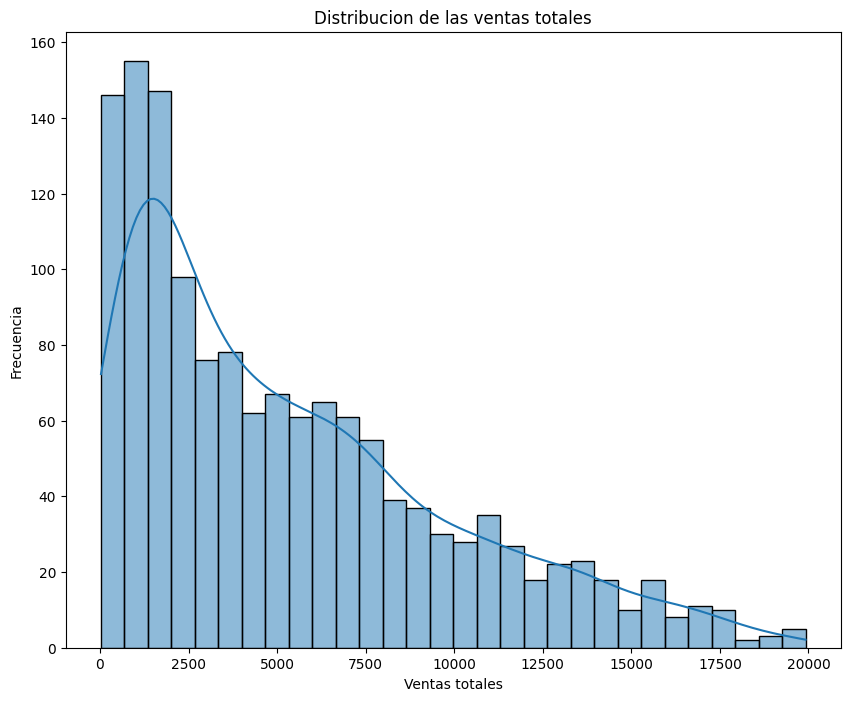

In [47]:
plt.figure(figsize=(10, 8))
sns.histplot(df['ventas_totales'], bins= 30, kde=True)
plt.title('Distribucion de las ventas totales')
plt.xlabel('Ventas totales')
plt.ylabel('Frecuencia')
plt.show

## VENTAS POR CATEGORIA

In [51]:
df.columns

Index(['id_venta', 'fecha', 'cliente', 'producto', 'categoria', 'cantidad',
       'precio_unitario', 'descuento', 'metodo_pago', 'ciudad',
       'ventas_totales'],
      dtype='object')

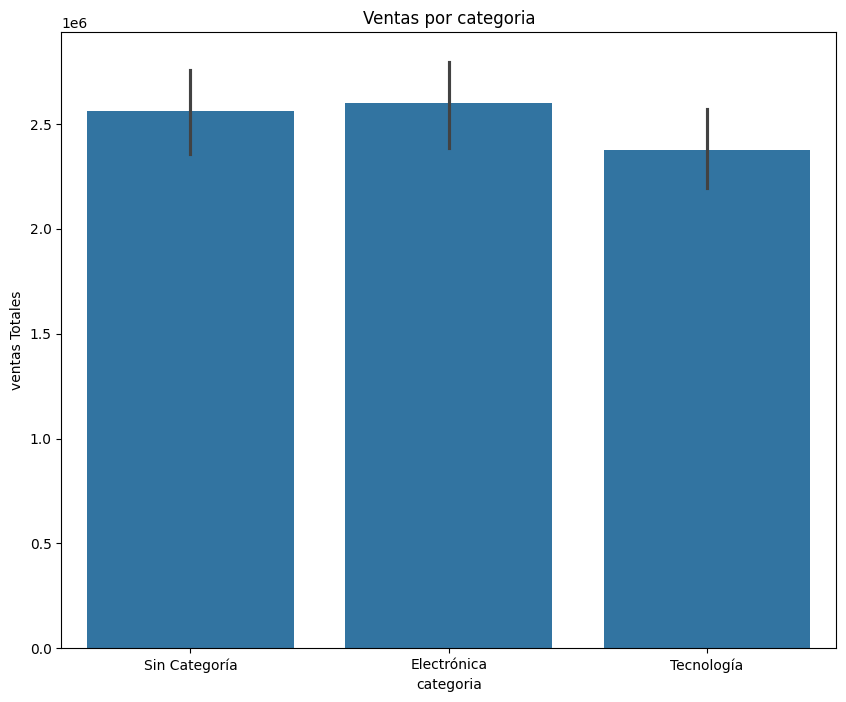

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x='categoria', y='ventas_totales', data=df, estimator=sum)

plt.ylabel('ventas Totales')
plt.title('Ventas por categoria')
plt.show()

## Metodo de pago mas usado

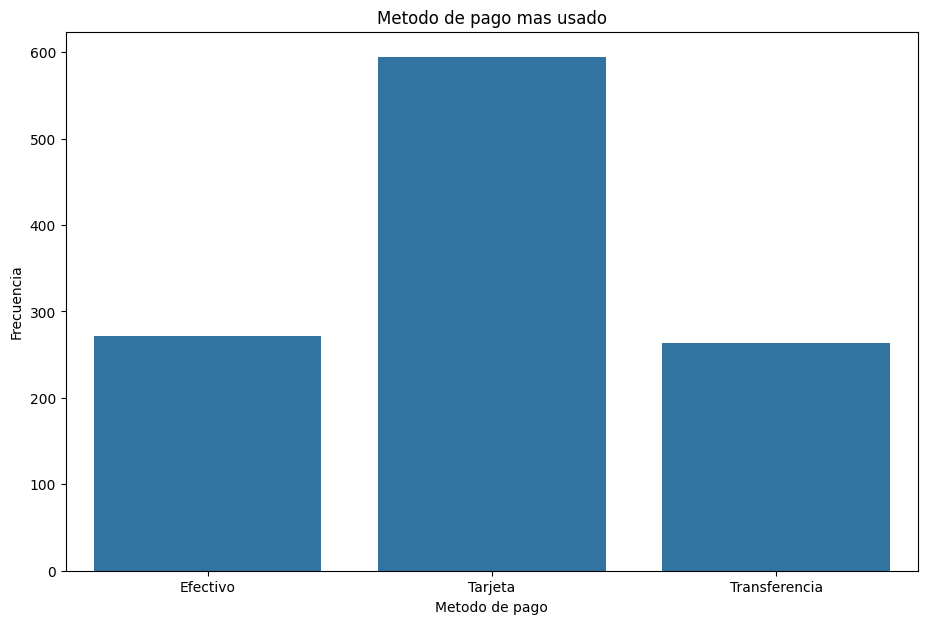

In [70]:
plt.figure(figsize=(11,7))
sns.countplot(x='metodo_pago', data=df)
plt.title('Metodo de pago mas usado')
plt.xlabel('Metodo de pago')
plt.ylabel('Frecuencia')
plt.show()

## CIUDADES CON MAS VENTAS

Text(0.5, 1.0, 'Top 10 ciudades con mas ventas')

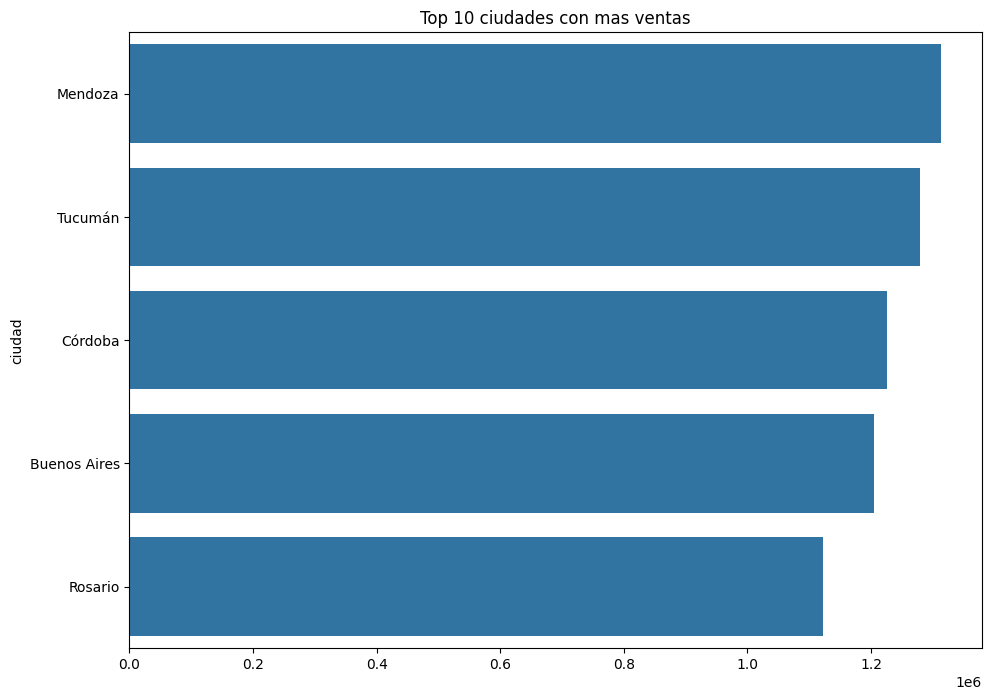

In [71]:
plt.figure(figsize= (11,8))
top_ciudades= df.groupby('ciudad')['ventas_totales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x= top_ciudades.values, y= top_ciudades.index)
plt.title('Top 10 ciudades con mas ventas')

## EVOLUCION DE VENTAS EN EL TIEMPO

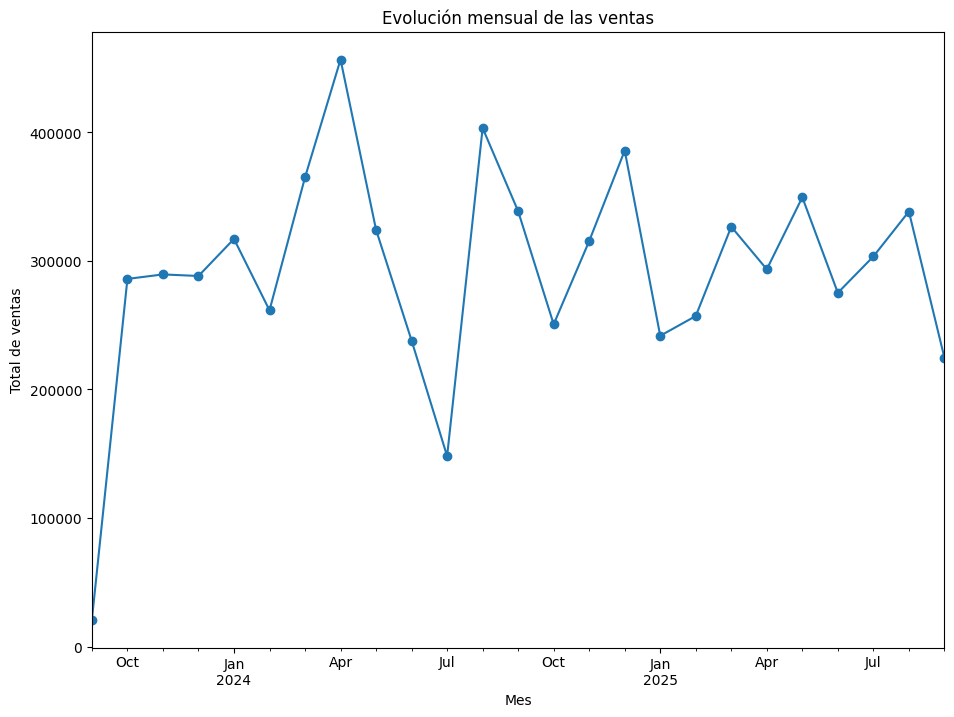

In [69]:
ventas_por_mes = df.groupby(df['fecha'].dt.to_period('M'))['ventas_totales'].sum()
plt.figure(figsize=(11,8))
ventas_por_mes.plot(marker="o")
plt.title("Evolución mensual de las ventas")
plt.xlabel("Mes")
plt.ylabel("Total de ventas")
plt.show()